In [2]:

import os
#import numpy as np 
import pandas as pd 
import math
from sklearn.model_selection import train_test_split

In [4]:
train_df = pd.read_csv("./input/train.csv")
train_df, val_df = train_test_split(train_df, test_size=0.1)

In [5]:
X_train = train_df['question_text']
y_train = train_df['target']
X_test = val_df['question_text']
y_test = val_df['target']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [7]:
vect = CountVectorizer().fit(X_train)
X_train_vec = vect.transform(X_train)
clfrNB = MultinomialNB(alpha = 0.1)
clfrNB.fit(X_train_vec, y_train)
preds = clfrNB.predict(vect.transform(X_test))
score = f1_score(y_test, preds)
print(score)

0.5403030968592137


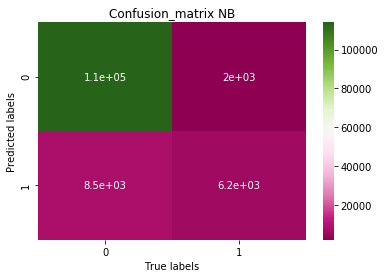

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def get_confusion_matrix(test_y, pred,title):
    cm=confusion_matrix(pred,test_y)
   
    fig = plt.figure()
    sns.heatmap(cm, cmap='PiYG', annot=True)
    plt.title(title)
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')
    plt.show()
    fig.savefig('NB_confusion_matrix')
 
get_confusion_matrix(y_test,preds,'Confusion_matrix NB')    

In [14]:
from sklearn.metrics import recall_score, precision_score
r = recall_score(y_test, preds, average='binary')
p = precision_score(y_test, preds, average='binary')
print('Precision: {:.3f} Recall: {:.3f}'.format(p, r))


Precision: 0.420 Recall: 0.757
